In [2]:
"""
数据加载和预处理模块

提供各种数据生成和加载功能，包括合成数据生成、
真实数据集加载和数据预处理功能。
"""

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.sans-serif"] = ["Songti SC"]  # 设置中文字体为黑体
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号


In [36]:
def create_spiral_data(n_samples=1000, n_classes=3, random_state=42):
    """
    创建螺旋形分类数据

    这是一个经典的非线性分类问题，适合测试神经网络的非线性学习能力。

    Args:
        n_samples (int): 每个类别的样本数量
        n_classes (int): 类别数量
        random_state (int): 随机种子

    Returns:
        tuple: (X, y) 特征和标签
    """
    np.random.seed(random_state)

    X = np.zeros((n_samples * n_classes, 2))
    y = np.zeros(n_samples * n_classes, dtype=np.int64)

    for class_idx in range(n_classes):
        # 生成螺旋的角度
        theta = np.linspace(0, 4 * np.pi, n_samples) + class_idx * 4 * np.pi / n_classes
        # 添加随机噪声
        radius = theta / (4 * np.pi) + np.random.randn(n_samples) * 0.1

        # 转换为笛卡尔坐标
        start_idx = class_idx * n_samples
        end_idx = (class_idx + 1) * n_samples

        X[start_idx:end_idx, 0] = radius * np.cos(theta)
        X[start_idx:end_idx, 1] = radius * np.sin(theta)
        y[start_idx:end_idx] = class_idx

    return X.astype(np.float32), y

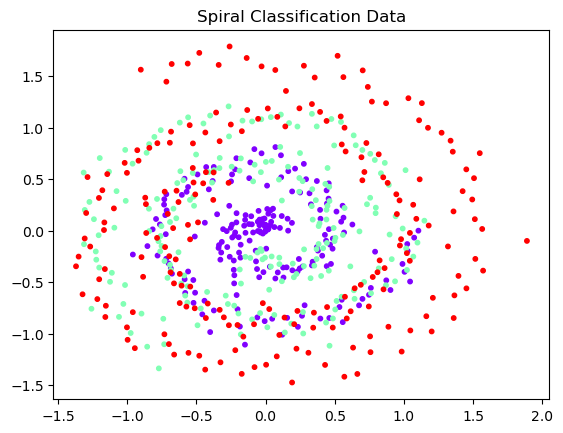

In [37]:
X, y = create_spiral_data(n_samples=200, n_classes=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s=10)
plt.title("Spiral Classification Data")
plt.show()

In [4]:
def generate_spiral_data(n_samples=200, n_classes=2, random_state=42):
    np.random.seed(random_state)
    X = np.zeros((n_samples * n_classes, 2))
    y = np.zeros(n_samples * n_classes, dtype=np.int64)

    for n_class in range(n_classes):
        theta = np.linspace(0, 4 * np.pi, n_samples) + n_class * 4 * np.pi / n_classes
        radius = (
            theta / (4 * np.pi) + np.random.normal(0, 1, n_samples) * 0.1
        )  # np.random.normal(0, 1, n_samples) * 0.1

        start_idx = n_class * n_samples
        end_idx = (n_class + 1) * n_samples

        X[start_idx:end_idx, 0] = radius * np.cos(theta)
        X[start_idx:end_idx, 1] = radius * np.sin(theta)
        y[start_idx:end_idx] = n_class

    return X.astype(np.float32), y


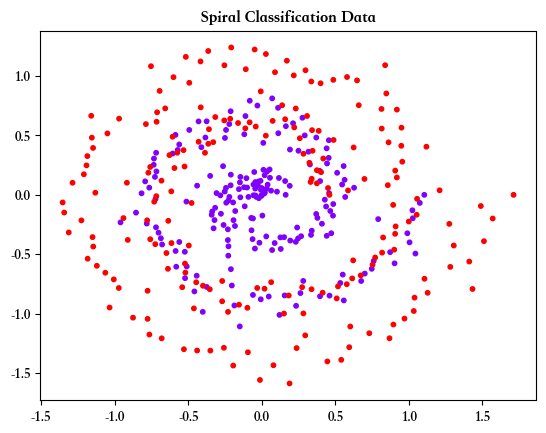

In [6]:
X, y = generate_spiral_data(n_samples=200, n_classes=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s=10)
plt.title("Spiral Classification Data")
plt.show()

In [3]:
def visualize_data(X, y, title="数据可视化", feature_names=None):
    # 检测是否为二维图表
    if X.shape[1] != 2:
        print("只能可视化二维图标")
        return

    plt.figure(figsize=(10, 8))
    # 统计类别数量
    unique_classes = np.unique(y)
    # 颜色映射
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))

    # 开始画散点图
    for i, class_label in enumerate(unique_classes):
        # 将同一类点全部找出来
        mask = y == class_label
        plt.scatter(
            X[mask, 0],
            X[mask, 1],
            c=colors[i],
            alpha=0.7,
            s=50,
            label=f"类别 {class_label}",
        )

    plt.title(title, fontsize=16)
    plt.xlabel(feature_names[0] if feature_names else "特征 1", fontsize=12)
    plt.ylabel(feature_names[1] if feature_names else "特征 2", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

/var/folders/zy/jm0qm3k11vxcrgh8t976lhp00000gn/T/ipykernel_47646/1186763771.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


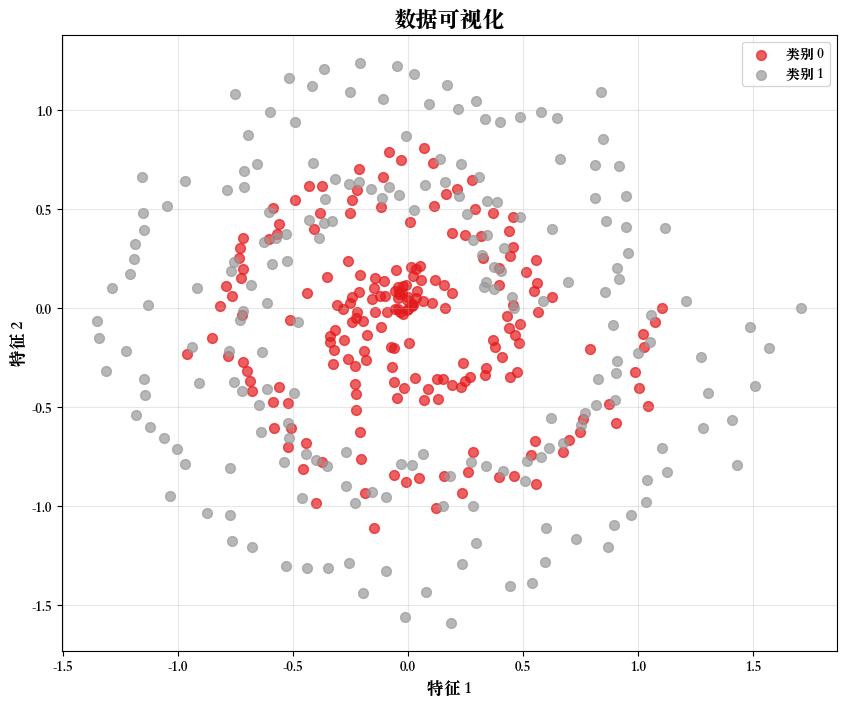

In [7]:
visualize_data(X, y)

In [ ]:
def create_moon_data(n_samples=1000, noise=0.1, random_state=42):
    """
    创建月牙形数据

    另一个经典的非线性分类问题。

    Args:
        n_samples (int): 样本数量
        noise (float): 噪声水平
        random_state (int): 随机种子

    Returns:
        tuple: (X, y) 特征和标签
    """
    from sklearn.datasets import make_moons

    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    return X.astype(np.float32), y.astype(np.int64)


X, y = create_moon_data()

/var/folders/zy/jm0qm3k11vxcrgh8t976lhp00000gn/T/ipykernel_47646/1186763771.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


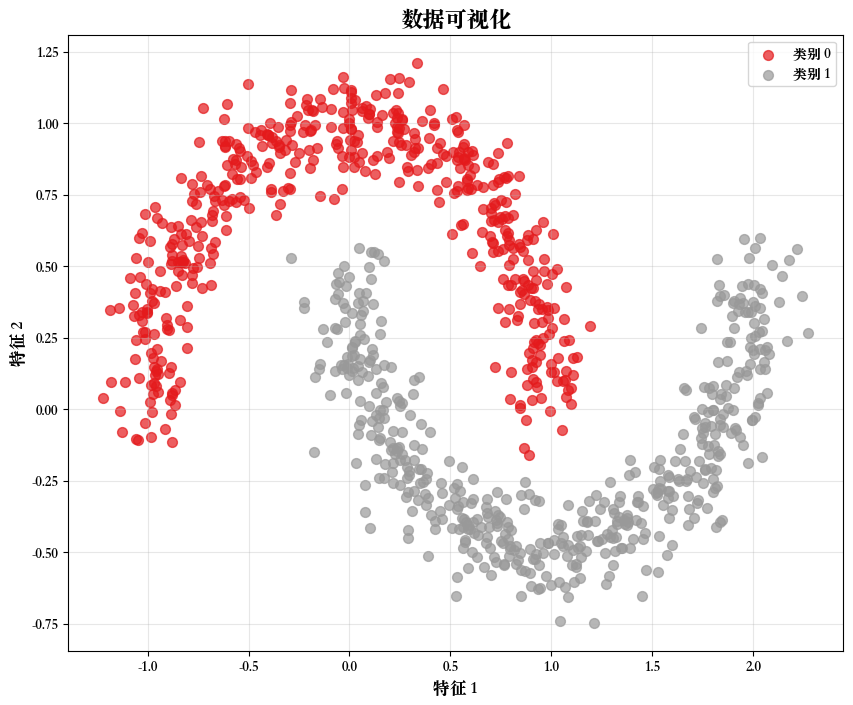

In [9]:
visualize_data(X, y)

In [ ]:
def create_circles_data(n_samples=1000, noise=0.1, factor=0.5, random_state=42):
    """
    创建同心圆数据

    用于测试模型处理复杂边界的能力。

    Args:
        n_samples (int): 样本数量
        noise (float): 噪声水平
        factor (float): 内外圆的比例
        random_state (int): 随机种子

    Returns:
        tuple: (X, y) 特征和标签
    """
    from sklearn.datasets import make_circles

    X, y = make_circles(
        n_samples=n_samples, noise=noise, factor=factor, random_state=random_state
    )
    return X.astype(np.float32), y.astype(np.int64)


X, y = create_circles_data()

/var/folders/zy/jm0qm3k11vxcrgh8t976lhp00000gn/T/ipykernel_47646/1186763771.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


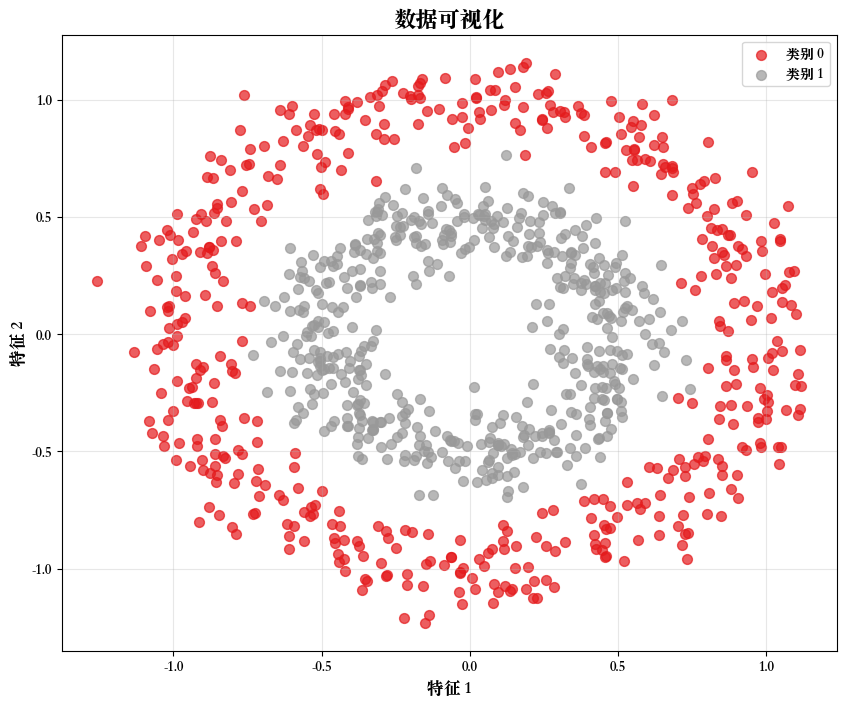

In [11]:
visualize_data(X, y)

In [ ]:
for a, b in zip((1, 2, 3), ("a", "b", "c")):
    print(a, b)

1 a
2 b
3 c


In [ ]:
for a, b, c in zip((1, "a"), (2, "b"), (3, "c")):
    print(a, b, c)

1 2 3
a b c


In [ ]:
[(1, "a"), (2, "b"), (3, "c")] == list(zip(*zip((1, "a"), (2, "b"), (3, "c"))))

True

In [ ]:
list(zip((1, "a"), (2, "b"), (3, "c")))

[(1, 2, 3), ('a', 'b', 'c')]

In [ ]:
list(zip(*zip((1, "a"), (2, "b"), (3, "c"))))

[(1, 'a'), (2, 'b'), (3, 'c')]